In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
admiral =  pd.read_csv("Policys.csv")
admiral.head()

,PolicyID,State,CoverageGap,CreditScore,Age,NumberOfVehicles,NewestVehicleAge,PriorAccidentCount,ZipCode,TimeInsured,ClaimAmount,ClaimFlag
0,1,FL,No Gap,397.0,35,1,9,0,60505,1.000000,0,0
1,2,NY,No Gap,584.0,50,6,5,0,89206,1.000000,0,0
2,3,NY,No Gap,452.0,70,2,16,0,99394,0.517808,1200,1
3,4,NY,No Gap,556.0,70,2,17,0,99394,1.000000,0,0
4,5,NY,No Gap,636.0,60,2,1,1,59154,0.947945,0,0


In [5]:
len(admiral)

77324

In [6]:
admiral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77324 entries, 0 to 77323
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PolicyID            77324 non-null  int64  
 1   State               77324 non-null  object 
 2   CoverageGap         77324 non-null  object 
 3   CreditScore         76192 non-null  float64
 4   Age                 77324 non-null  int64  
 5   NumberOfVehicles    77324 non-null  int64  
 6   NewestVehicleAge    77324 non-null  int64  
 7   PriorAccidentCount  77324 non-null  int64  
 8   ZipCode             77324 non-null  int64  
 9   TimeInsured         75040 non-null  float64
 10  ClaimAmount         77324 non-null  int64  
 11  ClaimFlag           77324 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 7.1+ MB


In [7]:
admiral.describe()

,PolicyID,CreditScore,Age,NumberOfVehicles,NewestVehicleAge,PriorAccidentCount,ZipCode,TimeInsured,ClaimAmount,ClaimFlag
count,77324.000000,76192.000000,77324.000000,77324.000000,77324.000000,77324.000000,77324.000000,75040.000000,77324.000000,77324.000000
mean,38662.500000,591.637993,40.070871,1.576690,7.731170,0.415524,55283.667943,0.654831,396.094356,0.069965
std,22321.660445,129.948099,13.783217,0.855357,5.808629,0.823362,27816.863737,0.364775,3428.802922,0.255090
min,1.000000,310.000000,15.000000,1.000000,0.000000,0.000000,10001.000000,0.002740,-3000.000000,0.000000
25%,19331.750000,491.000000,29.000000,1.000000,3.000000,0.000000,30448.000000,0.287671,0.000000,0.000000
50%,38662.500000,582.000000,39.000000,1.000000,7.000000,0.000000,57416.000000,0.802740,0.000000,0.000000
75%,57993.250000,676.000000,50.000000,2.000000,12.000000,1.000000,79476.000000,1.000000,0.000000,0.000000
max,77324.000000,1000.000000,73.000000,6.000000,54.000000,12.000000,99999.000000,1.000000,305000.000000,1.000000


In [8]:
admiral.isnull().sum()

PolicyID                 0
State                    0
CoverageGap              0
CreditScore           1132
Age                      0
NumberOfVehicles         0
NewestVehicleAge         0
PriorAccidentCount       0
ZipCode                  0
TimeInsured           2284
ClaimAmount              0
ClaimFlag                0
dtype: int64

## Dataset Overview

**Number of Rows**: 77,324  
**Number of Columns**: 12  

### Columns:
1. **PolicyID**: Unique identifier for each policy.  
2. **State**: State where the policyholder resides.  
3. **CoverageGap**: Indicates if there was a gap in coverage.  
4. **CreditScore**: Credit score of the policyholder (some missing values).  
5. **Age**: Age of the policyholder.  
6. **NumberOfVehicles**: Number of vehicles covered under the policy.  
7. **NewestVehicleAge**: Age of the newest vehicle in the policy.


we could see that the dataset have some columns with missing dataset. We must first able to treat this dataset especially supposed this dataset is going into model development. This missing columns may requires some statistical anaysis
The Claimflag column is the target variable espeically if we are building a model that detect fraudulent claims. if its to determine the claim worth for a customer, claim amount could be the tarhet vfariable. 

Professuional opionon here is that the ClaimFlag is the target variable.

I could fix the missing data with the stastical mean, mode or median. I could use forward fill or backward. but I will not be doing that bnecause of

1. I need to study the dataset to understand its statistical distribution
2. Check for an outliers that may reside within this data
3. ask questions perhaps from the data engineer to better be able to undertand how if it was a human error or a user for example nbot providing those missing columns
The point here is while there is a general way of cleaning but for production grade model, certain things can't just be assumed. we must first understand before going about its cleaning. this cleaningt could even just be by dropiing it the coilumns. if we look at the percentage of the missing columnsrelative to the entire dataset.

In [10]:
admiral['ClaimFlag'].value_counts()

ClaimFlag
0    71914
1     5410
Name: count, dtype: int64

In [ ]:
# Distribution of ClaimFlag
claim_flag_distribution = policy_data['ClaimFlag'].value_counts()

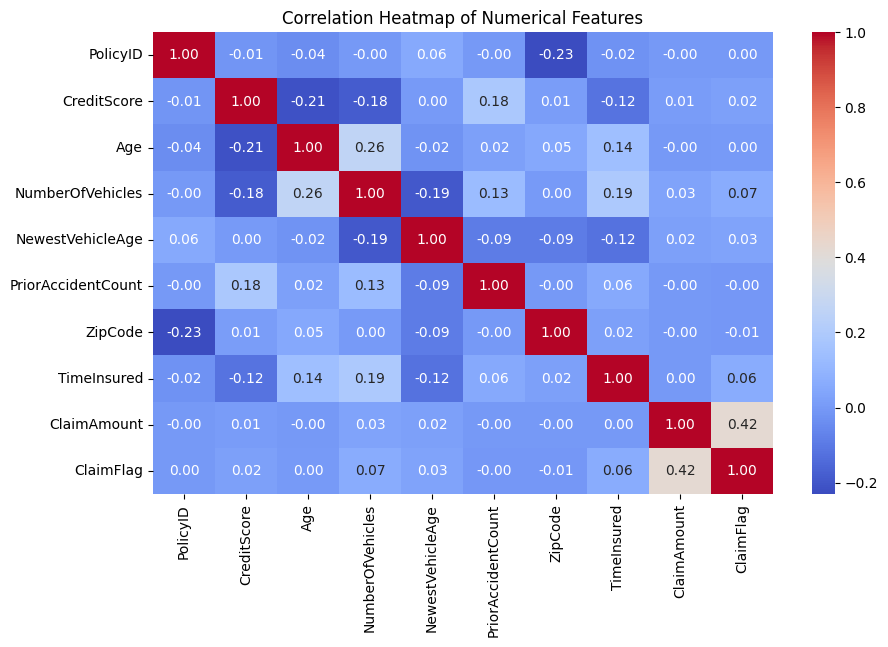

In [14]:
numerical_columns = admiral.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

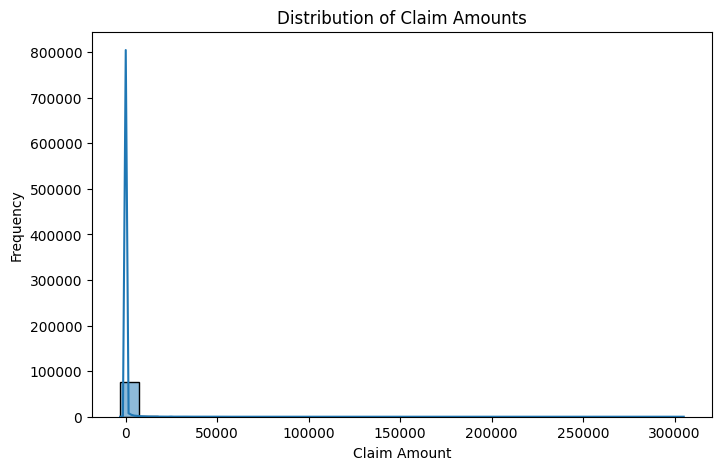

In [15]:
# Visualizing the distribution of ClaimAmount
plt.figure(figsize=(8, 5))
sns.histplot(admiral['ClaimAmount'], bins=30, kde=True)
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

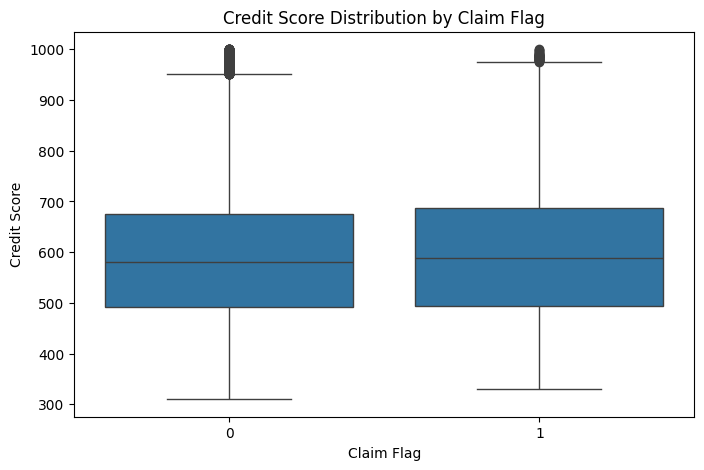

In [16]:
# Insights from CreditScore based on ClaimFlag
plt.figure(figsize=(8, 5))
sns.boxplot(data=admiral, x='ClaimFlag', y='CreditScore')
plt.title('Credit Score Distribution by Claim Flag')
plt.xlabel('Claim Flag')
plt.ylabel('Credit Score')
plt.show()

## Second Task Building a model with the Polciy Dataset

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
imputer = SimpleImputer(strategy='mean')
admiral['CreditScore'] = imputer.fit_transform(admiral[['CreditScore']])
admiral['TimeInsured'] = imputer.fit_transform(admiral[['TimeInsured']])

In [20]:
# Encoding categorical variables
label_encoder = LabelEncoder()
admiral['CoverageGap'] = label_encoder.fit_transform(admiral['CoverageGap'])
admiral['State'] = label_encoder.fit_transform(admiral['State'])

In [21]:
# Selecting features and target variable
features = ['CreditScore', 'Age', 'NumberOfVehicles', 'NewestVehicleAge', 'PriorAccidentCount', 'TimeInsured', 'CoverageGap', 'State']
X = admiral[features]
y = admiral['ClaimFlag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [23]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



In [24]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     14383
           1       0.45      0.03      0.05      1082

    accuracy                           0.93     15465
   macro avg       0.69      0.51      0.51     15465
weighted avg       0.90      0.93      0.90     15465

ROC-AUC Score: 0.722197422429411
Confusion Matrix:
 [[14348    35]
 [ 1053    29]]


In [25]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance)


Feature Importances:
               Feature  Importance
0         CreditScore    0.264161
1                 Age    0.208172
5         TimeInsured    0.183649
3    NewestVehicleAge    0.157145
7               State    0.064136
2    NumberOfVehicles    0.046498
4  PriorAccidentCount    0.044408
6         CoverageGap    0.031833


In [30]:
import joblib
model_path = "Admiral.pkl"
joblib.dump(model, model_path)

['Admiral.pkl']